# Phân loại dữ liệu với các phương pháp tập hợp mô hình  

## Câu 4

In [1]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

breast_cancer = datasets.load_breast_cancer()
wine = datasets.load_wine()
digits = datasets.load_digits()

datasets = {
    'Breast Cancer Wisconsin': breast_cancer,
    'Wine': wine,
    'Optical recognition of handwritten digits': digits
}

for name, dataset in datasets.items():
    X, y = dataset.data, dataset.target
    print(f"Dataset: {name}")
    tree = DecisionTreeClassifier()
    bagging = BaggingClassifier(tree, n_estimators=50, random_state=1)
    scores = cross_val_score(bagging, X, y, cv=5)  # 5-fold
    print(f"Accuracy: {scores.mean()*100}")


Dataset: Breast Cancer Wisconsin
Accuracy: 95.786368576308
Dataset: Wine
Accuracy: 96.09523809523809
Dataset: Optical recognition of handwritten digits
Accuracy: 90.37465181058496


## Câu 5

In [3]:
from sklearn.ensemble import AdaBoostClassifier

for name, dataset in datasets.items():
    X, y = dataset.data, dataset.target
    print(f"Dataset: {name}")
    tree = DecisionTreeClassifier(max_depth=2) 
    ada = AdaBoostClassifier(tree, n_estimators=50, random_state=1)
    scores = cross_val_score(ada, X, y, cv=5)
    print(f"Accuracy: {scores.mean()*100}")

Dataset: Breast Cancer Wisconsin
Accuracy: 96.48812296227295
Dataset: Wine
Accuracy: 92.76190476190477
Dataset: Optical recognition of handwritten digits
Accuracy: 60.49783348808418


## Câu 6

Dataset: Breast Cancer Wisconsin
Feature ranking:
1. feature 27 (0.12335024156999924)
2. feature 22 (0.11566085692145957)
3. feature 23 (0.10524820616710474)
4. feature 20 (0.10279833387928948)
5. feature 7 (0.10073450020780483)
6. feature 6 (0.0823334397273318)
7. feature 2 (0.060026500031259825)
8. feature 0 (0.058311093698516864)
9. feature 3 (0.038194145221943455)
10. feature 13 (0.026038574018435512)
11. feature 26 (0.02345364704498628)
12. feature 21 (0.019608956300665687)
13. feature 10 (0.018681159989618314)
14. feature 25 (0.01825771891314294)
15. feature 1 (0.01723752501481021)
16. feature 24 (0.01111740725127362)
17. feature 28 (0.010101662700401125)
18. feature 4 (0.0078132167070939)
19. feature 29 (0.00743072381264754)
20. feature 19 (0.00734404608211169)
21. feature 17 (0.006211907644073114)
22. feature 12 (0.005255408736531276)
23. feature 11 (0.00517100669188844)
24. feature 14 (0.0050976766440761845)
25. feature 5 (0.0050917080449914935)
26. feature 18 (0.0045172726376

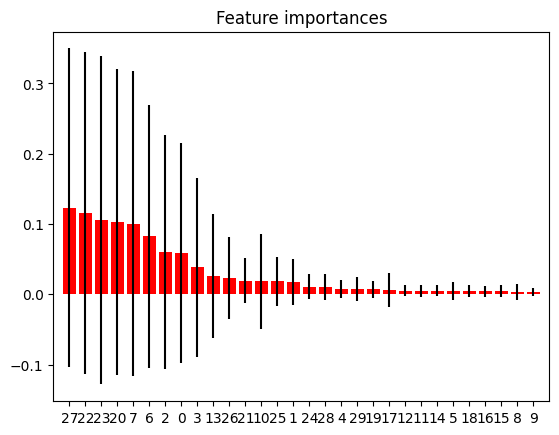

Dataset: Wine
Feature ranking:
1. feature 12 (0.18165472217970405)
2. feature 6 (0.16405456033116578)
3. feature 0 (0.14629376583675038)
4. feature 9 (0.13542866719018096)
5. feature 11 (0.12982441843920076)
6. feature 10 (0.08261251083501939)
7. feature 5 (0.04101333723103187)
8. feature 4 (0.03235370140772477)
9. feature 3 (0.0223479682382964)
10. feature 8 (0.021885449273181114)
11. feature 1 (0.01983801697320969)
12. feature 2 (0.012625329838567022)
13. feature 7 (0.010067552225967794)


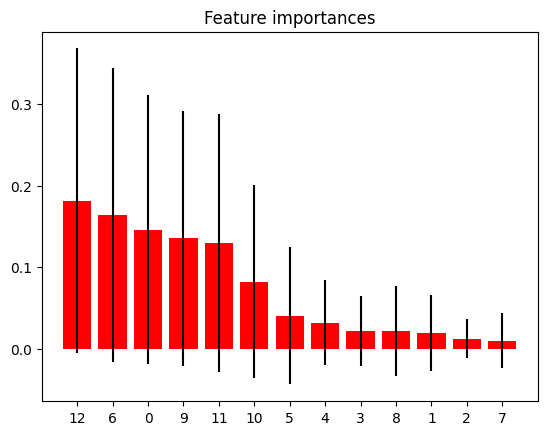

Dataset: Optical recognition of handwritten digits
Feature ranking:
1. feature 21 (0.04797894371724997)
2. feature 43 (0.04277415529469599)
3. feature 26 (0.03965779348670049)
4. feature 42 (0.037531246588452326)
5. feature 36 (0.03698114061697142)
6. feature 30 (0.03290306137270895)
7. feature 33 (0.031981777216672815)
8. feature 20 (0.029681508184380912)
9. feature 13 (0.028745274051543177)
10. feature 34 (0.028454495683174586)
11. feature 61 (0.028245599055051706)
12. feature 28 (0.028020607975459327)
13. feature 60 (0.026901138187681056)
14. feature 10 (0.026563934202482712)
15. feature 38 (0.026367985812265415)
16. feature 27 (0.025579206325232664)
17. feature 19 (0.025346312440657676)
18. feature 29 (0.02455298910308815)
19. feature 58 (0.02328425344917782)
20. feature 44 (0.02258065339008587)
21. feature 51 (0.022414059834322833)
22. feature 53 (0.022326961338425072)
23. feature 54 (0.021873798575494804)
24. feature 18 (0.021845008051192823)
25. feature 46 (0.02143529887378927)


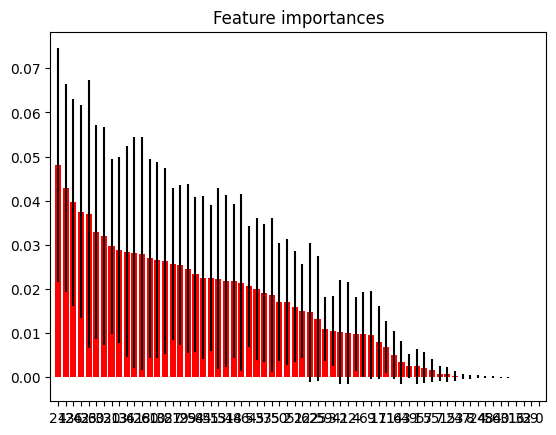

In [4]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Random Forest
for name, dataset in datasets.items():
    X, y = dataset.data, dataset.target
    print(f"Dataset: {name}")
    forest = RandomForestClassifier(n_estimators=100, random_state=1)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]

    print("Feature ranking:")
    for f in range(X.shape[1]):
        print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

    # Ve bieu do
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()